In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples= 1000 , n_classes=2, n_features=2 , n_clusters_per_class=2 , n_redundant=0)

In [69]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size= 0.3 , random_state=1)

In [71]:
x = pd.DataFrame(x)

In [73]:
x.shape

(1000, 2)

In [75]:
y.shape

(1000,)

In [77]:
print(x)

            0         1
0    1.377558  2.705500
1    1.589205  1.847140
2   -1.856911  0.950909
3    0.345046 -1.082027
4   -1.320322  0.997217
..        ...       ...
995  0.654203 -1.214381
996 -1.541338  2.375807
997  0.382177 -1.461796
998 -1.337211 -1.128287
999 -2.352386  0.220846

[1000 rows x 2 columns]


In [78]:
print(y)

[1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1
 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 0 0 1 0 0 0 1 1 1 0 1 1 

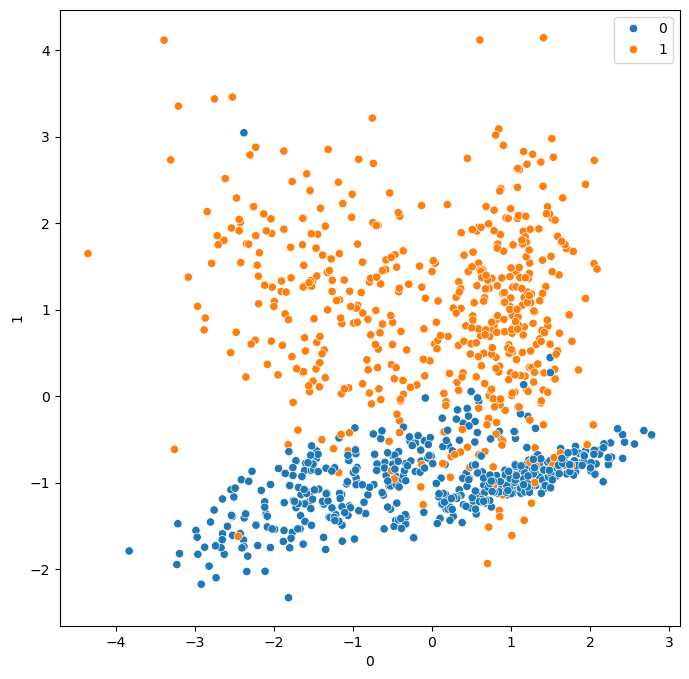

In [81]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = x[0],y = x[1],hue = y)
plt.show()

In [103]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [109]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [111]:
y_pred = model.predict(x_test)

In [113]:
print(f"the training is {model.score(x_train,y_train)*100:.2f}")

the training is 91.86


In [115]:
model.coef_

array([[-0.13012124,  2.12928341]])

In [123]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
print(f" the accuracy score of our modle is {accuracy_score(y_test , y_pred)*100:.2f} \n")
print(classification_report(y_test,y_pred))
print("\n",confusion_matrix(y_test,y_pred))

 the accuracy score of our modle is 93.00 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       162
           1       0.97      0.88      0.92       138

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300


 [[158   4]
 [ 17 121]]


In [134]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.5 , 1 , 2 , 5 ,10,50],
         'gamma' : [ 1 , 0.1 , 0.2 , 0.5  , 0.001 , 0.003],
         'kernel' : [ 'linear' ]} 
model_2 = GridSearchCV(SVC() , param_grid= param , cv=5 , verbose= 2)
model_2

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 2, 5, 10, 50],
                         'gamma': [1, 0.1, 0.2, 0.5, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=2)

In [136]:
model_2.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.2, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 2, 5, 10, 50],
                         'gamma': [1, 0.1, 0.2, 0.5, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=2)

In [138]:
model_2.best_estimator_

SVC(C=0.5, gamma=1, kernel='linear')

In [144]:
model_2.best_score_

0.9199999999999999

In [146]:
model_2.best_params_

{'C': 0.5, 'gamma': 1, 'kernel': 'linear'}

In [140]:
y_pred_cv = model_2.best_estimator_.predict(x_test)

In [142]:
print(f" the accuracy score of our modle is {accuracy_score(y_test , y_pred_cv)*100:.2f} \n")
print(classification_report(y_test,y_pred_cv))
print("\n",confusion_matrix(y_test,y_pred_cv))

 the accuracy score of our modle is 93.00 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       162
           1       0.97      0.88      0.92       138

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300


 [[158   4]
 [ 17 121]]
